# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f'\ndata shape is {data.shape}')
print(f'\nNaN values: {data.isna().any()}')
print(f'\nDuplicate rows: {data.duplicated().values.any()}')
print(f'\nData type of columns: {data.info()}')


data shape is (5391, 6)

NaN values: Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

Duplicate rows: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB

Data type of columns: None


In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'].str.replace('$', '').str.replace(',', ''))
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'].str.replace('$', '').str.replace(',', ''))
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', ''))

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [7]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(f'Type of Release_Date data {type(data["Release_Date"][0])}')

Type of Release_Date data <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
print(data.describe())
print(f"Minimum Domestic, and worldwide: {data['USD_Domestic_Gross'].min()}, {data['USD_Worldwide_Gross'].min()}")
print(f"Highest Production budget and highest worldwide gross revenue: {data['USD_Production_Budget'].max()}, {data['USD_Worldwide_Gross'].max()}")
print(f"Movie with highest budget: {data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()]}")
print(f"Lowest Production budget and lowest worldwide gross revenue: {data['USD_Production_Budget'].min()}, {data['USD_Worldwide_Gross'].min()}")
print(f"Movie with lowest budget: {data[data['USD_Production_Budget'] == data['USD_Production_Budget'].min()]}")

          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [9]:
domestic_no_revenue_movies = data[data['USD_Domestic_Gross'] == 0]
print(f'Number of domestic movies with 0 gross revenue: {len(domestic_no_revenue_movies)}')
print(domestic_no_revenue_movies.head())
print(f'Highest Budget with no revenue: {domestic_no_revenue_movies[domestic_no_revenue_movies["USD_Production_Budget"] == domestic_no_revenue_movies["USD_Production_Budget"].max()]}')

Number of domestic movies with 0 gross revenue: 512
    Rank Release_Date                       Movie_Title  \
1   5140   1916-05-09                       Intolerance   
6   4630   1927-12-08                             Wings   
8   4240   1930-01-01                     Hell's Angels   
17  4814   1936-10-20  Charge of the Light Brigade, The   
27  4789   1941-10-28           How Green Was My Valley   

    USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                  385907                    0                   0  
6                 2000000                    0                   0  
8                 4000000                    0                   0  
17                1200000                    0                   0  
27                1250000                    0                   0  
Highest Budget with no revenue:       Rank Release_Date  Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31  Singularity              175000000   

      USD_Worldwide_

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [10]:
worldwide_no_revenue_movies = data[data['USD_Worldwide_Gross'] == 0]
print(f"Number of movies with 0 gross revenue: {len(worldwide_no_revenue_movies)}")
print(f'Highest budget movie with 0 revenue: {worldwide_no_revenue_movies[worldwide_no_revenue_movies["USD_Production_Budget"] == worldwide_no_revenue_movies["USD_Production_Budget"].max()]}')

Number of movies with 0 gross revenue: 357
Highest budget movie with 0 revenue:       Rank Release_Date  Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31  Singularity              175000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  


### Filtering on Multiple Conditions

In [11]:
data.loc[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [12]:
data.query('(USD_Worldwide_Gross != 0) and (USD_Domestic_Gross == 0)')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [13]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [14]:
not_released_then = data.loc[data['Release_Date'] > scrape_date]
print(f'Number of movies that did not released from scrape date: {len(not_released_then)}')
not_released_then.head()

Number of movies that did not released from scrape date: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


In [15]:
data_clean = data.drop(not_released_then.index)

In [16]:
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [17]:
data_clean.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","88,970,947.21","41,289,131.75"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,929,036.00","1,354,765.25"
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,537,329.00","17,221,932.00"
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,641,996.25","52,403,530.00"
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,555.79",NaN,"40,440,041.47","168,536,755.89","66,055,507.64"


In [18]:
lost_money_movies = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f'Films that Lost Money Percentage: {lost_money_movies.shape[0] / data_clean.shape[0] * 100}')
lost_money_movies

Films that Lost Money Percentage: 37.27711738484398


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
...,...,...,...,...,...,...
5371,4901,2017-07-28,An Inconvenient Sequel,1000000,130874,130874
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


# Seaborn for Data Viz: Bubble Charts

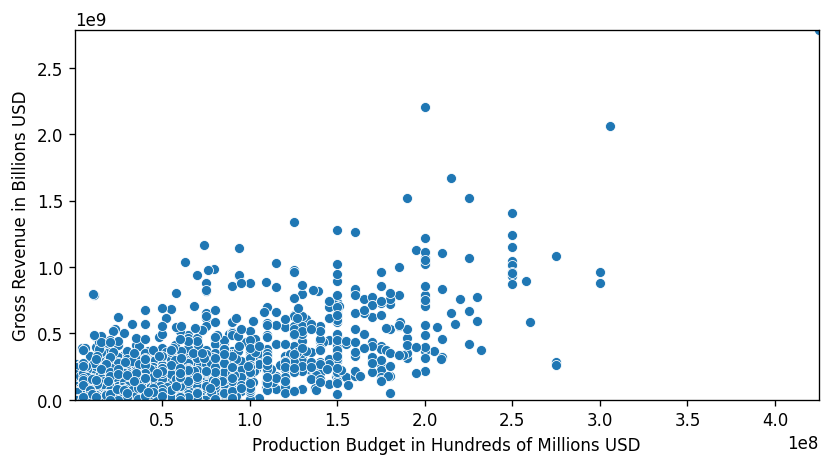

In [19]:
plt.figure(figsize=(8, 4), dpi=120)
ax = sns.scatterplot(data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

ax.set(
    ylim=(data_clean['USD_Worldwide_Gross'].min(), data_clean['USD_Worldwide_Gross'].max()),
    xlim=(data_clean['USD_Production_Budget'].min(), data_clean['USD_Production_Budget'].max()),
    ylabel='Gross Revenue in Billions USD',
    xlabel='Production Budget in Hundreds of Millions USD')

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



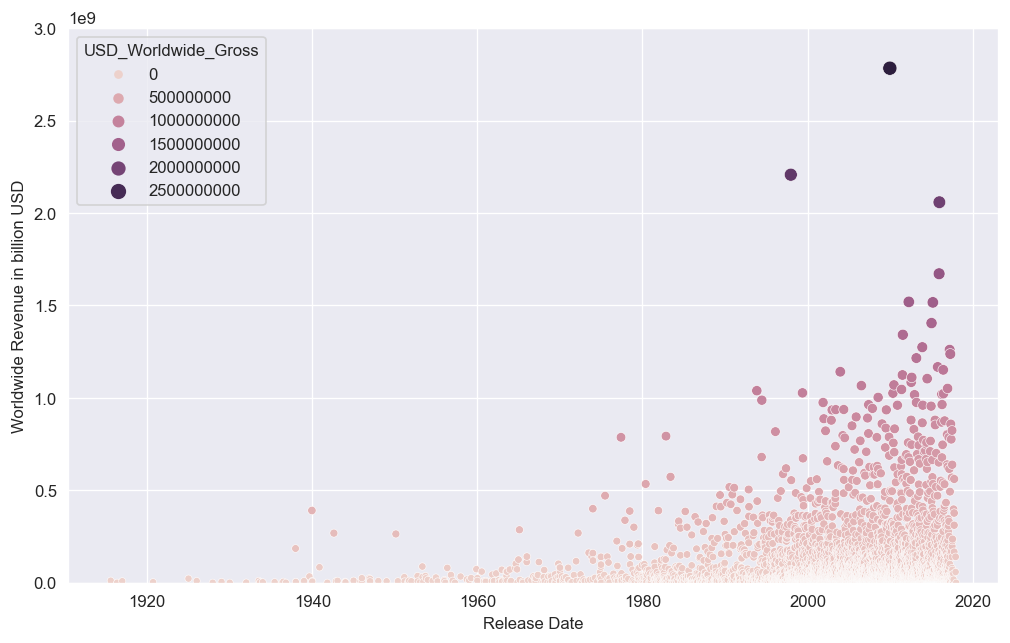

In [32]:
plt.figure(figsize=(10, 6), dpi=120)
sns.set_style(style='darkgrid')
x2 = sns.scatterplot(data_clean, y='USD_Worldwide_Gross', x='Release_Date', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

x2.set(ylabel='Worldwide Revenue in billion USD', xlabel='Release Date', ylim=(0, 3000000000))
plt.show()

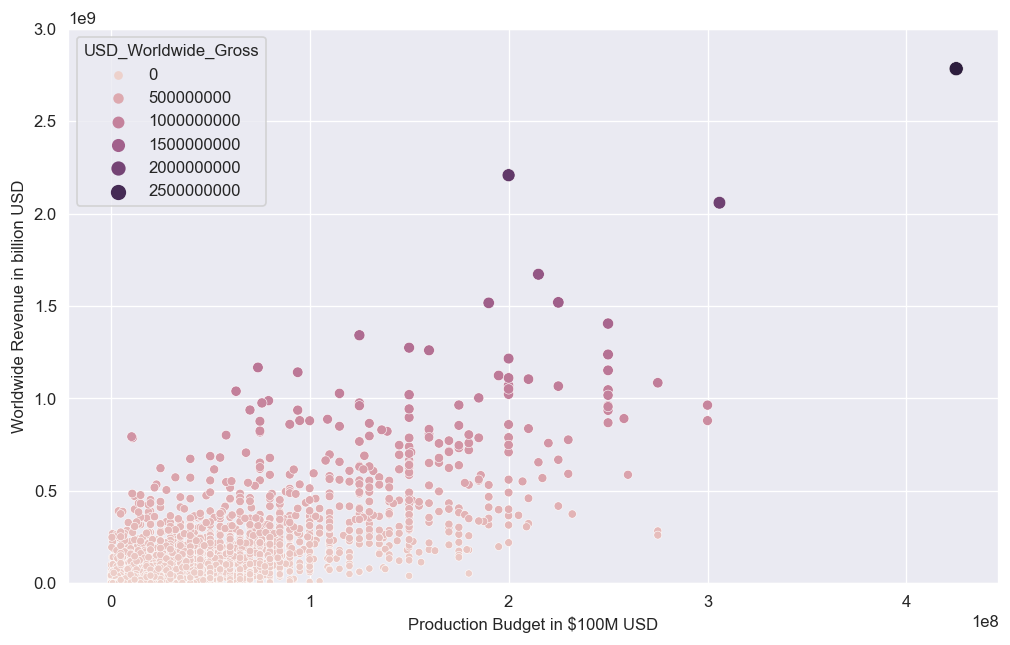

In [30]:
plt.figure(figsize=(10, 6), dpi=120)
sns.set_style(style='darkgrid')
x2 = sns.scatterplot(data_clean, y='USD_Worldwide_Gross', x='USD_Production_Budget', hue='USD_Worldwide_Gross', size='USD_Worldwide_Gross')

x2.set(ylabel='Worldwide Revenue in billion USD', xlabel='Production Budget in $100M USD', ylim=(0, 3000000000))
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 